## Regression in PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [3]:
# y = m * x + b
#Some random noise added
y = -0.5*x + 2 + torch.normal(mean = torch.zeros(8), std = 0.2)  

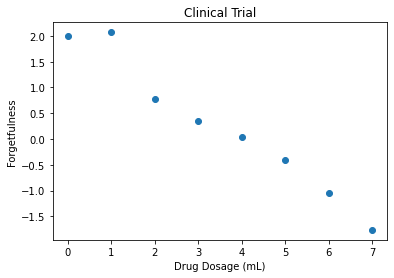

In [4]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel('Drug Dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x, y)

In [5]:
m = torch.tensor([0.9]).requires_grad_()
print(m)

tensor([0.9000], requires_grad=True)


In [6]:
b = torch.tensor([0.1]).requires_grad_()
print(b)

tensor([0.1000], requires_grad=True)


### Simple Regression Function

In [7]:
#Define our regression function
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

### Regression Plot Function

In [8]:
#Regression plot function
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    ax.scatter(my_x, my_y)
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b)
    y_max = regression(x_max, my_m, my_b)
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

In [9]:
yhat = regression(x, m, b)
print(yhat)

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)


In [10]:
#Mean square error
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma / len(my_y)

In [11]:
#Cost function
C = mse(yhat, y)
print(C)

tensor(19.9992, grad_fn=<DivBackward0>)


### Auto-diff to calculate gradient C

In [12]:
C.backward()

In [13]:
m.grad

tensor([36.1551])

In [14]:
b.grad

tensor([5.9938])

## Gradient Descent - PyTorch

In [15]:
optimizer = torch.optim.SGD([m, b], lr = 0.01)
optimizer.step()        #Take one step

In [16]:
print(str(m) + '\n' + str(b))

tensor([0.5384], requires_grad=True)
tensor([0.0401], requires_grad=True)


### Run 1000 epochs

In [17]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()       #Reset gradient to zero in each pass
    yhat = regression(x, m, b)
    C = mse(yhat, y)
    C.backward()
    optimizer.step()
    print('Epoch {}, Cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), 
                            '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, Cost 9.01, m grad 23.1, b grad 3.34
Epoch 1, Cost 4.56, m grad 14.8, b grad 1.66
Epoch 2, Cost 2.75, m grad 9.48, b grad 0.594
Epoch 3, Cost 2.01, m grad 6.12, b grad -0.0822
Epoch 4, Cost 1.7, m grad 3.99, b grad -0.509
Epoch 5, Cost 1.56, m grad 2.63, b grad -0.778
Epoch 6, Cost 1.5, m grad 1.76, b grad -0.946
Epoch 7, Cost 1.46, m grad 1.21, b grad -1.05
Epoch 8, Cost 1.44, m grad 0.861, b grad -1.11
Epoch 9, Cost 1.42, m grad 0.638, b grad -1.15
Epoch 10, Cost 1.4, m grad 0.495, b grad -1.17
Epoch 11, Cost 1.39, m grad 0.404, b grad -1.19
Epoch 12, Cost 1.37, m grad 0.346, b grad -1.19
Epoch 13, Cost 1.36, m grad 0.308, b grad -1.19
Epoch 14, Cost 1.34, m grad 0.283, b grad -1.19
Epoch 15, Cost 1.33, m grad 0.267, b grad -1.18
Epoch 16, Cost 1.31, m grad 0.257, b grad -1.18
Epoch 17, Cost 1.3, m grad 0.249, b grad -1.17
Epoch 18, Cost 1.28, m grad 0.244, b grad -1.17
Epoch 19, Cost 1.27, m grad 0.24, b grad -1.16
Epoch 20, Cost 1.25, m grad 0.238, b grad -1.15
Epoch 21, Co

In [19]:
print(str(m) + '\n' + str(b))

tensor([-0.5440], requires_grad=True)
tensor([2.1551], requires_grad=True)


In [20]:
print(str(x) + '\n' + str(y))

tensor([0., 1., 2., 3., 4., 5., 6., 7.])
tensor([ 2.0027,  2.0720,  0.7733,  0.3529,  0.0407, -0.4052, -1.0476, -1.7642])


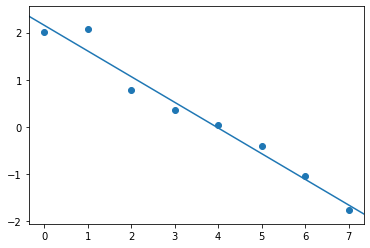

In [25]:
regression_plot(x, y, m.detach().numpy(), b.detach().numpy())